<a href="https://colab.research.google.com/github/vk3232/Digital_Signal_Processing/blob/main/Exp5_FIR_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exp5: FIR filter design**

**Name: Vrushabh Babasaheb Khatik**

**Roll No: 313072**

**GR No: 22020234**

**Batch: C3**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fc = 2500
fs = 20000
N = 51
M = N

## Impuls responce of LPF

[ 9.00316316e-03 -9.74542958e-18 -9.78604691e-03 -1.44686312e-02
 -1.07180514e-02  9.74542958e-18  1.18462673e-02  1.76838826e-02
  1.32399458e-02 -9.74542958e-18 -1.50052719e-02 -2.27364204e-02
 -1.73137753e-02  9.74542958e-18  2.04617345e-02  3.18309886e-02
  2.50087866e-02 -9.74542958e-18 -3.21541541e-02 -5.30516477e-02
 -4.50158158e-02  9.74542958e-18  7.50263597e-02  1.59154943e-01
  2.25079079e-01  2.50000000e-01  2.25079079e-01  1.59154943e-01
  7.50263597e-02  9.74542958e-18 -4.50158158e-02 -5.30516477e-02
 -3.21541541e-02 -9.74542958e-18  2.50087866e-02  3.18309886e-02
  2.04617345e-02  9.74542958e-18 -1.73137753e-02 -2.27364204e-02
 -1.50052719e-02 -9.74542958e-18  1.32399458e-02  1.76838826e-02
  1.18462673e-02  9.74542958e-18 -1.07180514e-02 -1.44686312e-02
 -9.78604691e-03 -9.74542958e-18  9.00316316e-03]


<StemContainer object of 3 artists>

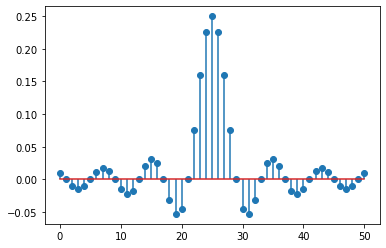

In [3]:
hd = np.zeros(N)
p = (M-1)/2
for n in range(N):
  if n != p:
    hd[n] = (np.sin((2*np.pi*fc/fs)*(n-p)))/(np.pi*(n-p))
  else:
    hd[n] = (2*np.pi*fc/fs)/np.pi

print(hd)
plt.figure(1)
plt.stem(hd,use_line_collection=True)

In [4]:
from scipy import signal
import matplotlib.pyplot as plt 
w =np.zeros(M)

## Rectangular window side lobe attenuationn 13db

In [5]:
def Rect():
  for n in range(M):
    w[n] = 1
  print(w)
  plt.figure(1)
  plt.stem(w,use_line_collection=True)
  print(len(w))


## Bartlett(triangublar) side lobe attenuationn 27db

In [6]:
def Bart():
  for n in range(M):
    w[n] = 1 - (2*(abs(n-((M-1)/2)))/(M-1))
  print(w)
  plt.figure(1)
  plt.stem(w,use_line_collection=True)


## Blackmann side lobe attenuationn 58db

In [7]:
def Black():
  for n in range(M):
    w[n] = 0.42 - (0.5 * np.cos((2*np.pi*n)/(M-1))) / (0.08 * np.cos((4*np.pi*n)/(M-1)))
  print(w)
  plt.figure(1)
  plt.stem(w,use_line_collection=True)


## Hamming Side lobe attenuation 43db

In [8]:
def Hamm():
  for n in range(M):
    w[n] = 0.54 - (0.46*np.cos((2*np.pi*n)/(M-1)))
  print(w)
  plt.figure(1)
  plt.stem(w,use_line_collection=True)


## Hanning Side lobe attenuation 32db

In [9]:
def Hann():
  for n in range(M):
    w[n] = 0.5 - (0.5*np.cos((2*np.pi*n)/(M-1)))
  print(w)
  plt.figure(1)
  plt.stem(w,use_line_collection=True)

8
[0.         0.00394265 0.01570842 0.03511176 0.06184666 0.0954915
 0.13551569 0.18128801 0.2320866  0.28711035 0.3454915  0.40630934
 0.46860474 0.53139526 0.59369066 0.6545085  0.71288965 0.7679134
 0.81871199 0.86448431 0.9045085  0.93815334 0.96488824 0.98429158
 0.99605735 1.         0.99605735 0.98429158 0.96488824 0.93815334
 0.9045085  0.86448431 0.81871199 0.7679134  0.71288965 0.6545085
 0.59369066 0.53139526 0.46860474 0.40630934 0.3454915  0.28711035
 0.2320866  0.18128801 0.13551569 0.0954915  0.06184666 0.03511176
 0.01570842 0.00394265 0.        ]


(-60.0, 60.0)

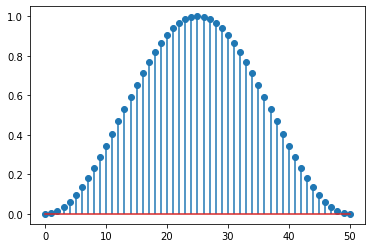

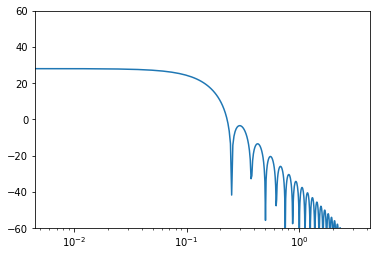

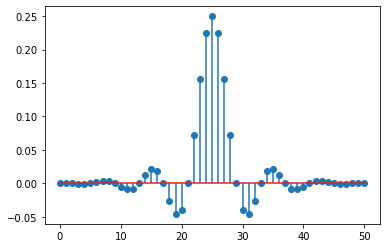

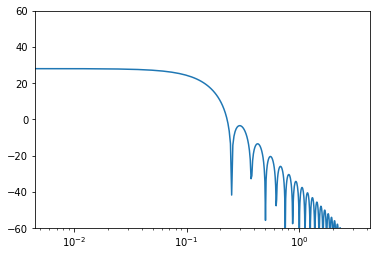

In [18]:
c = int(input())
if c== 1:
  Rect()
elif c == 2:
  Bart()
elif c == 3:
  Black()
elif c== 4:
  Hamm()
else:
  Hann()

# low pass filter coefficient and diff window
plt.figure(2)
w1,h1 =  signal.freqz(w,1)
plt.semilogx(w1, 20*np.log10(abs(h1)))
plt.ylim(-60,60)

h = np.zeros(N)
for n in range(1,M-1):
  h[n] = hd[n] * w[n]

plt.figure(3)
plt.stem(h,use_line_collection=True)

# h is filter responce 

plt.figure(4)
w2,h2 =  signal.freqz(h,1)
plt.semilogx(w1, 20*np.log10(abs(h1)))
plt.ylim(-60,60)